https://www.kaggle.com/code/annastasy/cnn-in-digit-recognition-99-5/notebook

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
os.chdir('E:\Python code\手写字体')

train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

# Separating features and labels

In [4]:
X = train.drop("label", axis=1) 
y = train.label

# Data normalization¶
This step ensures that our input data is in a suitable range for training a neural network, leading to better performance and faster learning.

In [5]:
# Normalize the data (scale pixel values between 0 and 1)
X = X / 255.0
X_test = test / 255.0

Spliting data into training and testing sets

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

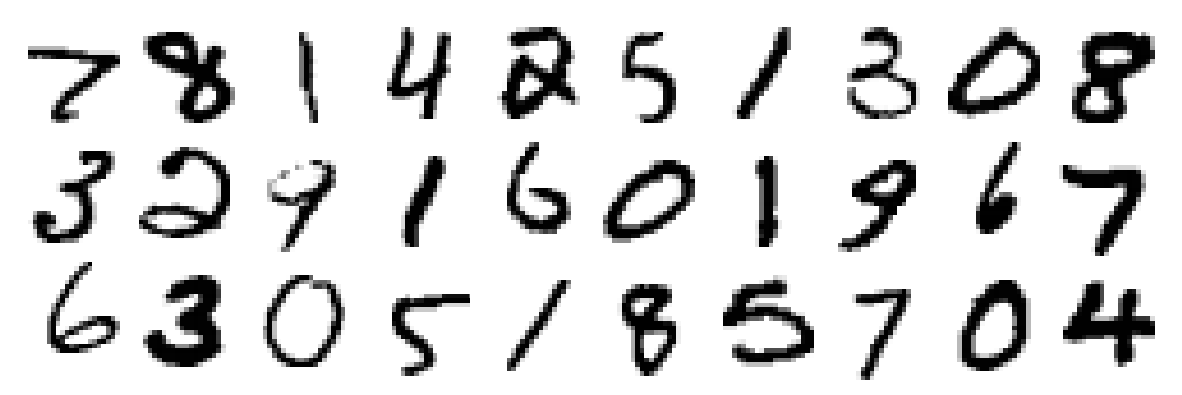

In [7]:
X_reshaped = X_train.to_numpy().reshape(-1, 28, 28, 1)

plt.figure(figsize=(15, 5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_reshaped[i, :, :, 0], cmap=plt.cm.binary)  # Access the 28x28 image directly
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# 4. Dense Neural Network
¶
A dense neural network, also known as a fully connected neural network (FCNN) or multi-layer perceptron (MLP), is a machine learning model that connects each layer to the previous layer.

We will train the model through iterative steps, starting with a simple version. If the model shows signs of high bias or underfitting, we'll increase its complexity. If the model shows high variance or overfitting, we'll boost the regularization. This approach should help us achieve better results.

In [8]:
# Define a simple model
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [9]:
# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


1182/1182 [==============================] - 4s 2ms/step - loss: 0.4891 - accuracy: 0.8616 - val_loss: 0.2664 - val_accuracy: 0.9210
Epoch 2/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2294 - accuracy: 0.9334 - val_loss: 0.2077 - val_accuracy: 0.9381
Epoch 3/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1853 - accuracy: 0.9456 - val_loss: 0.1955 - val_accuracy: 0.9436
Epoch 4/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1639 - accuracy: 0.9513 - val_loss: 0.1831 - val_accuracy: 0.9450
Epoch 5/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1440 - accuracy: 0.9576 - val_loss: 0.1704 - val_accuracy: 0.9498
Epoch 6/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1316 - accuracy: 0.9614 - val_loss: 0.1765 - val_accuracy: 0.9490
Epoch 7/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1219 - accuracy: 0.9630 - val_loss: 0.1639 - val_accurac

In [11]:
# Define a model with regularization
model = Sequential([
    Dense(units=25, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=15, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))
])

# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 3s 2ms/step - loss: 0.6027 - accuracy: 0.8526 - val_loss: 0.3587 - val_accuracy: 0.9224
Epoch 2/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.9330 - val_loss: 0.3214 - val_accuracy: 0.9379
Epoch 3/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3004 - accuracy: 0.9429 - val_loss: 0.3008 - val_accuracy: 0.9424
Epoch 4/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2829 - accuracy: 0.9484 - val_loss: 0.2889 - val_accuracy: 0.9464
Epoch 5/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2717 - accuracy: 0.9534 - val_loss: 0.2749 - val_accuracy: 0.9507
Epoch 6/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2633 - accuracy: 0.9567 - val_loss: 0.2764 - val_accuracy: 0.9507
Epoch 7/30
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2562 - accuracy: 0.9582 - val_loss: 0.2669 - val_accuracy:

In [12]:
# Define a deeper and more complex model
model = Sequential([
    Dense(units=512, activation='relu', kernel_regularizer=L2(0.001)),  # Increased units
    Dropout(0.4),  # Add dropout to prevent overfitting
    Dense(units=256, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.4),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=32, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))  
])

# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Reduced learning rate for better convergence
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  # Increased epochs

Epoch 1/50
1182/1182 [==============================] - 9s 6ms/step - loss: 2.8317 - accuracy: 0.3999 - val_loss: 1.6417 - val_accuracy: 0.8152
Epoch 2/50
1182/1182 [==============================] - 7s 6ms/step - loss: 1.7359 - accuracy: 0.7421 - val_loss: 1.2628 - val_accuracy: 0.8926
Epoch 3/50
1182/1182 [==============================] - 7s 6ms/step - loss: 1.4142 - accuracy: 0.8328 - val_loss: 1.1210 - val_accuracy: 0.9126
Epoch 4/50
1182/1182 [==============================] - 7s 6ms/step - loss: 1.2424 - accuracy: 0.8734 - val_loss: 1.0294 - val_accuracy: 0.9252
Epoch 5/50
1182/1182 [==============================] - 7s 6ms/step - loss: 1.1252 - accuracy: 0.8982 - val_loss: 0.9515 - val_accuracy: 0.9374
Epoch 6/50
1182/1182 [==============================] - 7s 6ms/step - loss: 1.0278 - accuracy: 0.9138 - val_loss: 0.8930 - val_accuracy: 0.9438
Epoch 7/50
1182/1182 [==============================] - 7s 6ms/step - loss: 0.9564 - accuracy: 0.9229 - val_loss: 0.8330 - val_accuracy:

# 5. Convolutional Neural Network

Convolutional Neural Networks (CNNs) are powerful for image recognition tasks because they can capture spatial features, like edges, patterns, and shapes, making them much more effective than dense neural networks for working with images.

However, to take advantage of CNNs, we need to reshape our data. The images in the dataset are originally stored as flat 1D vectors (with 784 elements for 28x28 pixel images). CNNs, though, require the data to be in 2D (28x28) with a depth of 1 for grayscale images. This allows the CNN to process the pixel structure properly and detect patterns.

That’s why we convert our data from DataFrames to NumPy arrays and reshape them to (28, 28, 1). This gives CNNs the right format to work with, preserving the spatial relationships between pixels.

In [13]:
# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val = X_val.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

# Define a model with Conv2D layers
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),    # First conv layer
    MaxPooling2D(pool_size=(2, 2)),   # Pooling layer
    Dropout(0.2),  # Dropout to reduce overfitting
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),  # Second conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),   # Third conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),    # Flatten the output for dense layers
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),  # Fully connected layer
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),   
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  


Epoch 1/50
1182/1182 [==============================] - 15s 12ms/step - loss: 0.9384 - accuracy: 0.6979 - val_loss: 0.2385 - val_accuracy: 0.9402
Epoch 2/50
1182/1182 [==============================] - 14s 12ms/step - loss: 0.3060 - accuracy: 0.9129 - val_loss: 0.1637 - val_accuracy: 0.9612
Epoch 3/50
1182/1182 [==============================] - 14s 11ms/step - loss: 0.2375 - accuracy: 0.9354 - val_loss: 0.1347 - val_accuracy: 0.9671
Epoch 4/50
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1990 - accuracy: 0.9466 - val_loss: 0.1171 - val_accuracy: 0.9714
Epoch 5/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.1750 - accuracy: 0.9541 - val_loss: 0.1071 - val_accuracy: 0.9771
Epoch 6/50
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1566 - accuracy: 0.9597 - val_loss: 0.0985 - val_accuracy: 0.9786
Epoch 7/50
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1424 - accuracy: 0.9652 - val_loss: 0.0947 

# Data Augmentation¶
Data augmentation is a powerful technique used to improve the performance and generalization of machine learning models, especially in image recognition tasks like digit recognition. The idea behind data augmentation is to artificially increase the size and diversity of the training dataset by applying random transformations to the original images, such as rotations, zooms, shifts, or flips. This helps the model learn more robust features and reduces the risk of overfitting.

Since our training dataset may not be large or varied enough, data augmentation allows us to create new variations of the existing images, simulating real-world scenarios where digits might be slightly tilted, resized, or shifted. This technique makes the model more adaptable and better at recognizing digits in various conditions.

For this project, we use data augmentation to randomly rotate, shift, or zoom in on images, enhancing the model's ability to generalize well to unseen data. This ensures that the model doesn't simply memorize the training images but learns patterns that can be applied to new data.

# Key Aspects:
Rotation Range (5 degrees): Digit recognition can benefit from slight rotations as handwritten digits may not be perfectly aligned. A small range like 5 degrees keeps the transformation realistic without distorting the digits.

Zoom Range (0.1): A 10% zoom allows the model to learn from digits that may be written smaller or larger, which adds robustness.

Width/Height Shift (0.1): Small translations mimic slight variations in where digits might appear in images. This helps the model handle digits that are not perfectly centered.

In [14]:
datagen = ImageDataGenerator(
        rotation_range=5,         # Randomly rotate images by up to 5 degrees
        zoom_range=0.1,            # Randomly zoom images by up to 10%
        width_shift_range=0.1,     # Randomly shift images horizontally by up to 10% of width
        height_shift_range=0.1,    # Randomly shift images vertically by up to 10% of height
)

datagen.fit(X_train)

In [15]:
# Define a more complex model with adjusted architecture
model = Sequential([
    # First convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Second convolutional block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Third convolutional block
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.3),
    
    # Output layer for classification
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,   
                    validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 [==============================] - 38s 31ms/step - loss: 1.9040 - accuracy: 0.3693 - val_loss: 0.4670 - val_accuracy: 0.9145
Epoch 2/50
1182/1182 [==============================] - 36s 31ms/step - loss: 0.8492 - accuracy: 0.7458 - val_loss: 0.1661 - val_accuracy: 0.9664
Epoch 3/50
1182/1182 [==============================] - 36s 31ms/step - loss: 0.5302 - accuracy: 0.8593 - val_loss: 0.1475 - val_accuracy: 0.9726
Epoch 4/50
1182/1182 [==============================] - 37s 31ms/step - loss: 0.3895 - accuracy: 0.9048 - val_loss: 0.1385 - val_accuracy: 0.9750
Epoch 5/50
1182/1182 [==============================] - 37s 31ms/step - loss: 0.3172 - accuracy: 0.9273 - val_loss: 0.1199 - val_accuracy: 0.9836
Epoch 6/50
1182/1182 [==============================] - 37s 31ms/step - loss: 0.2725 - accuracy: 0.9434 - val_loss: 0.1096 - val_accuracy: 0.9845
Epoch 7/50
1182/1182 [==============================] - 37s 31ms/step - loss: 0.2413 - accuracy: 0.9507 - val_loss: 0.1037 -

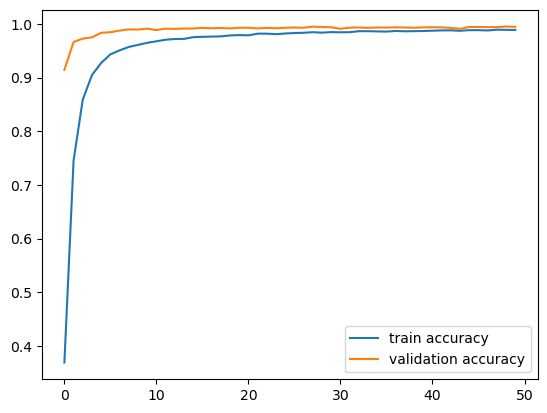

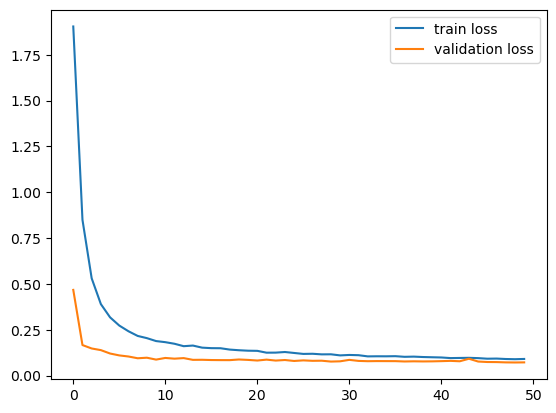

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

132/132 [==============================] - 1s 9ms/step


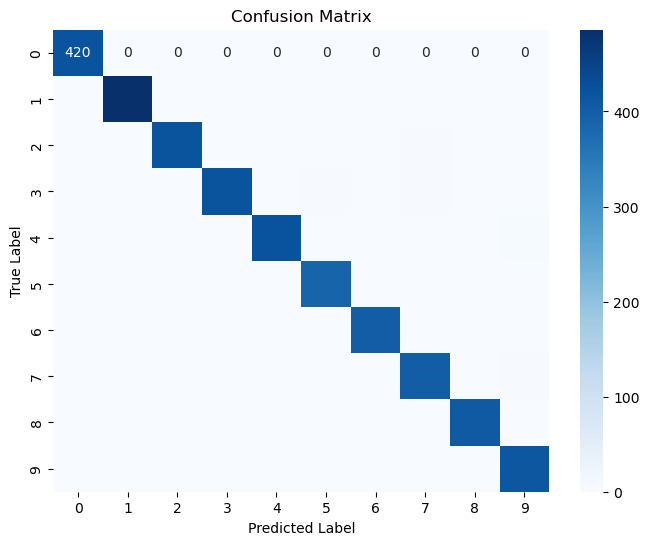

In [17]:
# 1. Make predictions on the validation or test set
y_pred_probs = model.predict(X_val)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 3. Define class names (digits 0 to 9)
class_names = [i for i in range(10)]

# 4. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Predictions

In [18]:
predictions = model.predict(X_test, batch_size=128)

219/219 [==============================] - 6s 28ms/step


In [19]:
predicted_classes = np.argmax(predictions, axis=1)

In [20]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})
submission_df.to_csv('submission.csv', index=False)